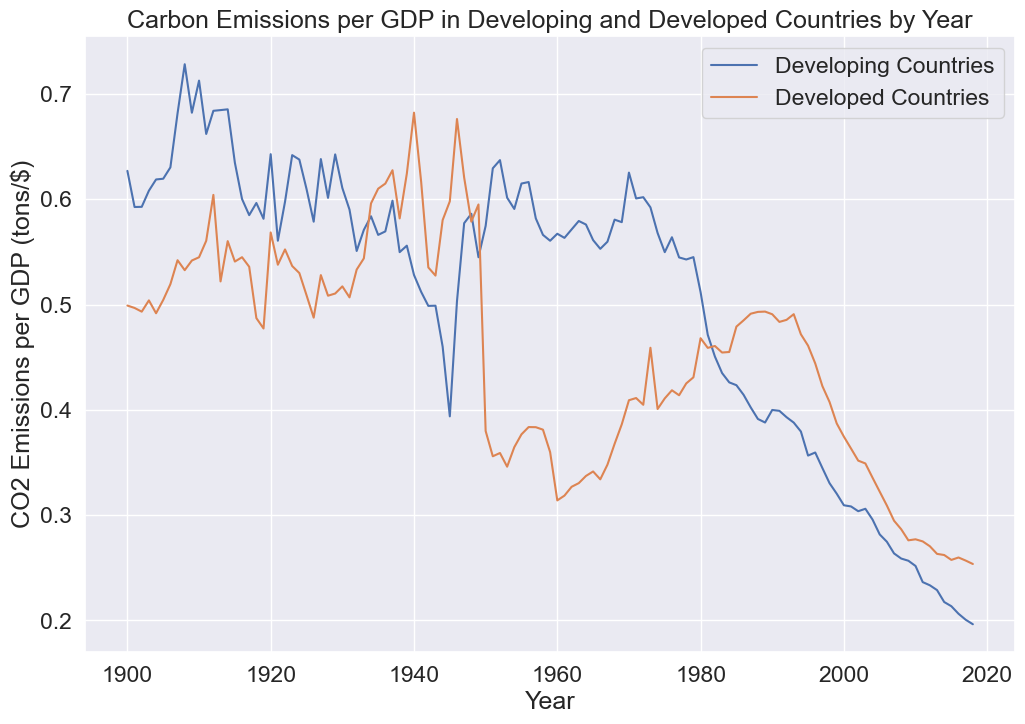

In [249]:
import pandas as pd
import matplotlib.pyplot as plt

#发达国家集合
developed_countries = {"United States", "Canada", "United Kingdom", "Australia", "New Zealand",
                    "Japan", "South Korea", "Germany", "France", "Italy", "Spain", "Netherlands",
                    "Sweden", "Norway", "Denmark", "Switzerland", "Austria", "Belgium", "Finland",
                    "Ireland", "Iceland", "Luxembourg", "Singapore", "Hong Kong", "Taiwan"}

# 读取数据集并筛选所需列
data = pd.read_csv("owid-co2-data.csv")
data = data[["country", "year", "co2_per_gdp"]]
data = data.loc[data["year"] >= 1900]
data = data.dropna()

# 按国家、年份、碳排放强度排序
data = data.sort_values(by=["country", "year", "co2_per_gdp"])

# 将数据分成发展中国家和发达国家
developing_countries = data[data["country"].isin(developed_countries)]
developed_countries = data[~data["country"].isin(developed_countries)]

# 按年份和碳排放强度分组，并计算平均值
devd_df = developed_countries.groupby(["year"])["co2_per_gdp"].mean().reset_index()
devp_df = developing_countries.groupby(["year"])["co2_per_gdp"].mean().reset_index()

# 绘制发展中国家和发达国家的碳排放强度与单位 GDP 的关系图
plt.plot(devp_df["year"], devp_df["co2_per_gdp"], label="Developing Countries")
plt.plot(devd_df["year"], devd_df["co2_per_gdp"], label="Developed Countries")

plt.xlabel("Year")
plt.ylabel("CO2 Emissions per GDP (tons/$)")
plt.title("Carbon Emissions per GDP in Developing and Developed Countries by Year")
plt.legend()
plt.show()


C:\Users\HBW\AppData\Local\Temp\ipykernel_17024\119156909.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_developed['country_type'] = 'Developed'
C:\Users\HBW\AppData\Local\Temp\ipykernel_17024\119156909.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_developing['country_type'] = 'Developing'


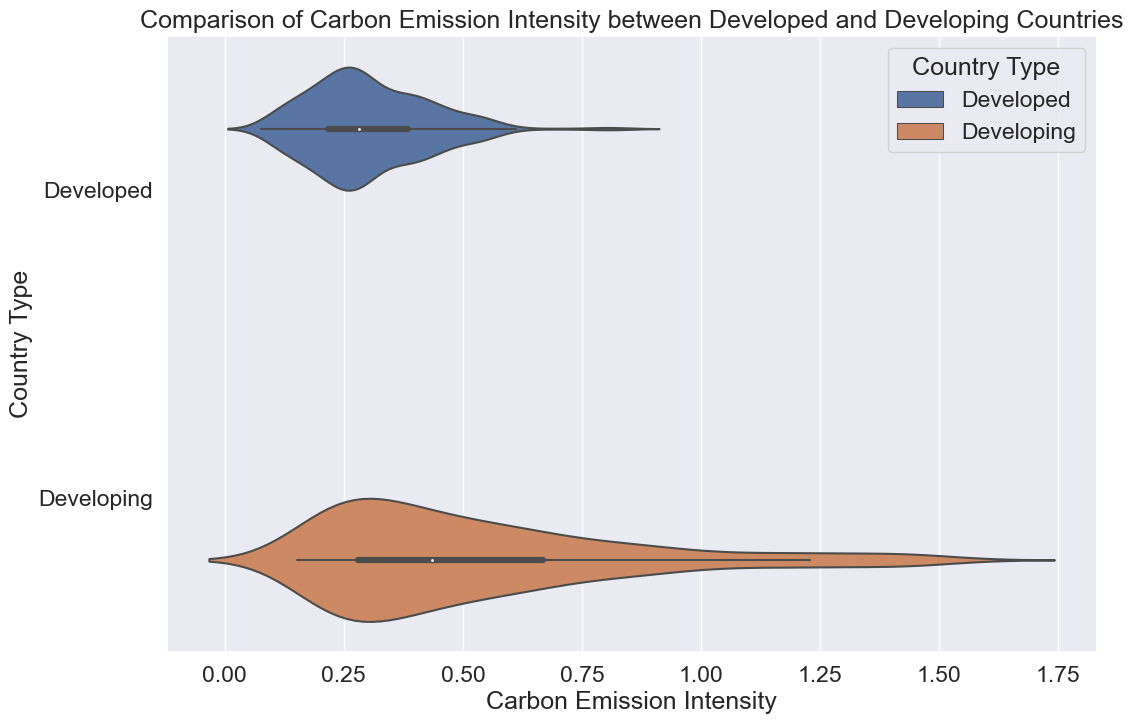

In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv('owid-co2-data.csv')

# 剔除包含 null 值的行
df = df.dropna()

# 选取发展中国家和发达国家数据
developed_countries = {"United States", "Canada", "United Kingdom", "Australia", "New Zealand",
                       "Japan", "South Korea", "Germany", "France", "Italy", "Spain", "Netherlands",
                       "Sweden", "Norway", "Denmark", "Switzerland", "Austria", "Belgium", "Finland",
                       "Ireland", "Iceland", "Luxembourg", "Singapore", "Hong Kong", "Taiwan"}

df_developed = df[df['country'].isin(developed_countries)]
df_developing = df[~df['country'].isin(developed_countries)]

# 设置图形尺寸和字体大小
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=1.5)

# 将 "country" 列中的值替换为 "Developed" 或 "Developing"
df_developed['country_type'] = 'Developed'
df_developing['country_type'] = 'Developing'
df_combined = pd.concat([df_developed, df_developing], ignore_index=True)

# 绘制小提琴图
ax = sns.violinplot(x='co2_per_gdp', y='country_type', hue='country_type',
                    data=df_combined)

ax.set_xlabel('Carbon Emission Intensity')
ax.set_ylabel('Country Type')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title='Country Type')
plt.title('Comparison of Carbon Emission Intensity between Developed and Developing Countries')
plt.show()


C:\Users\HBW\AppData\Local\Temp\ipykernel_17024\2721158162.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developed['year'] = pd.to_datetime(developed['year'], format='%Y')
C:\Users\HBW\AppData\Local\Temp\ipykernel_17024\2721158162.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developing['year'] = pd.to_datetime(developing['year'], format='%Y')


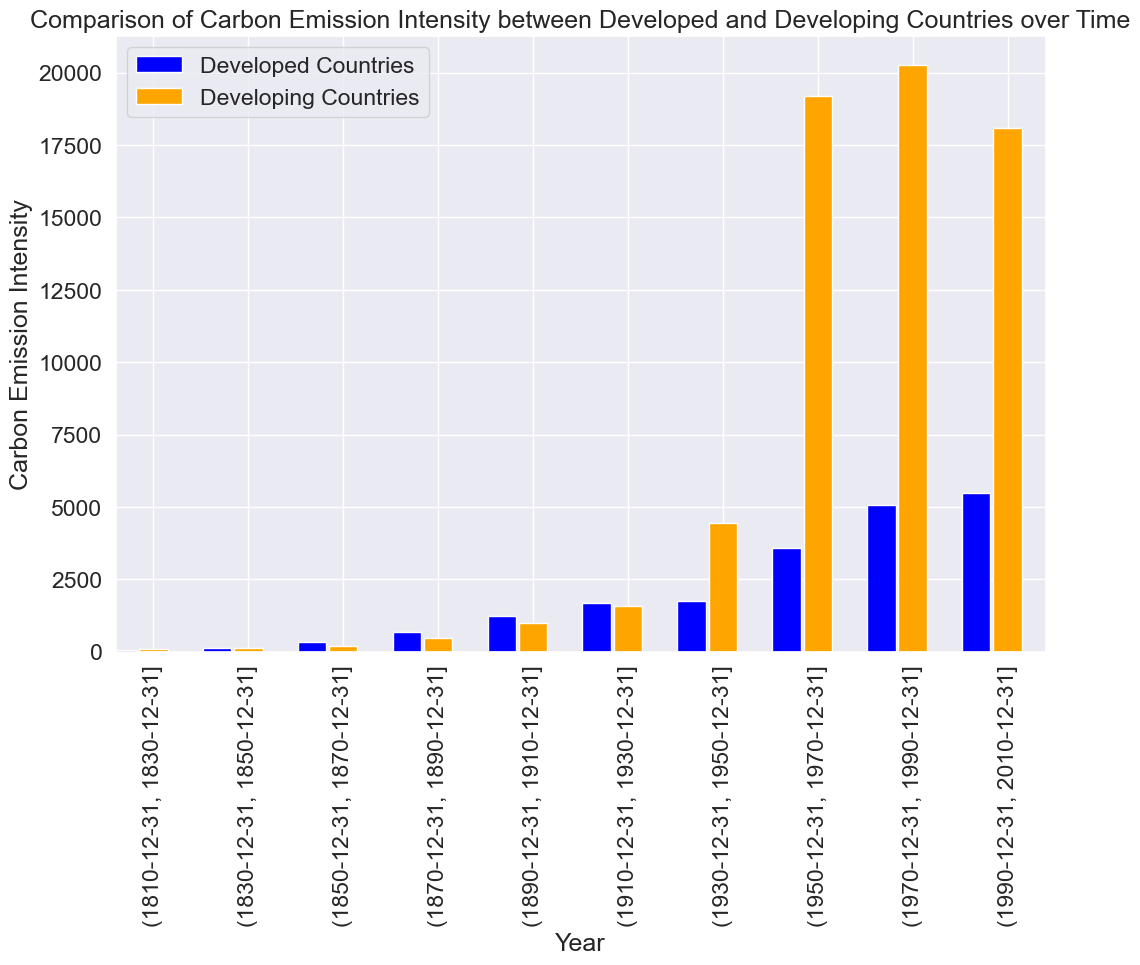

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('owid-co2-data.csv')

# 根据国家名称将国家分为发达国家和发展中国家
developed_country = {"United States", "Canada", "United Kingdom", "Australia", "New Zealand",
                    "Japan", "South Korea", "Germany", "France", "Italy", "Spain", "Netherlands",
                    "Sweden", "Norway", "Denmark", "Switzerland", "Austria", "Belgium", "Finland",
                    "Ireland", "Iceland", "Luxembourg", "Singapore", "Hong Kong", "Taiwan"}

df["country_type"] = np.where(df["country"].isin(developed_country), "developed", "developing")

# 将数据按照国家分类
developed = df[df['country_type'] == 'developed']
developing = df[df['country_type'] == 'developing']

# 将 year 列转换为 datetime 类型
developed['year'] = pd.to_datetime(developed['year'], format='%Y')
developing['year'] = pd.to_datetime(developing['year'], format='%Y')

# 将数据按照每 20 年分组
bins = pd.date_range(start='1810-01-01', end='2021-01-01', freq='20Y')
developed_grouped = developed.groupby(pd.cut(developed['year'], bins)).sum()
developing_grouped = developing.groupby(pd.cut(developing['year'], bins)).sum()

# 创建堆积柱状图
ax = developed_grouped.plot(kind='bar', stacked=True, y='co2_per_capita', color='blue', position=1.6, width=0.3)
developing_grouped.plot(kind='bar', stacked=True, y='co2_per_capita', ax=ax, color='orange', width=0.3)

ax.set_xlabel('Year')
ax.set_ylabel('Carbon Emission Intensity')

ax.legend(['Developed Countries', 'Developing Countries'])
plt.title('Comparison of Carbon emissions per capita between Developed and Developing Countries over Time')
plt.show()


# 总结

由图一，在1900年到1980年间，全球进入高速发展的时代，排除二战时间，发展中国家碳排放强度都高于发达国家。因此，发展中国家应该更多承担气候变化和减排的责任。

由图二，发展中国家碳排放强度的中位数与平均数都显著高于发达国家，代表着发展中国家生产和消费方式更加碳密集，而发达国家则采用更多的低碳技术和能源替代品，在减少碳排放上做出了更大的努力。因此，发展中国家应该更多承担气候变化和减排的责任。

由图三，近现代发展中国家人均碳排放量上显著高于发达国家，而在90年代后出现下降趋势，因此，发展中国家应该更多承担气候变化和减排的责任。
